# Graficación de datos de Covid-19, Costa Rica al 30 de mayo de 2022
##                       Universidad de Costa Rica, escuela de Geografía

##                                     GF-0657 Programación en SIG
##                                   Profesor: Manuel Vargas Del Valle

##                                                          Estudiantes:
##                                    Jose Luis Gamboa Mora, B78769
##                                      Antony Cordero Zúñiga, B82335

## Carga de librerías:

In [57]:
# Carga de librerías pandas, geopandas y plotly.graph_objects

import pandas as pd
import pandas as gpd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np

## Carga y preparación de los datos Covid de Costa Rica:

In [93]:
# Carga datos "05_30_22_CSV_GENERAL.csv"
## Se coloca sep=";", para la división de columnas por medio de ;
covid_generales = pd.read_csv("Datos/05_30_22_CSV_GENERAL.csv", sep=";", encoding="iso-8859-1")
covid_positivos = pd.read_csv("Datos/05_30_22_CSV_POSITIVOS.csv", sep=";", encoding="iso-8859-1")  

# Preparación de los datos:
# Selección de columnas:
covid_generales = covid_generales[["FECHA", "hom_posi", "muj_posi", "menor_posi", "adul_posi", "am_posi", "nue_posi"]]
covid_positivos = covid_positivos[["provincia", "canton", "30/05/2022"]]

# Eliminación valores nulos con .dropna
covid_generales = covid_generales.dropna(how='all')
covid_positivos = covid_positivos.dropna(how='all')

# Eliminación de fila con valores iguales a otros
covid_positivos = covid_positivos[covid_positivos["canton"] != "Otros"]

# Renombramiento de nombres de columnas:
covid19_positivos = covid_positivos.rename(columns={"30/05/2022": "positivos"})

covid19_generales = covid_generales.rename(
    columns={
        "FECHA": "fecha",
        "hom_posi":"hombres_positivos",
        "muj_posi": "mujeres_positivas",
        "menor_posi": "menores_positivos",
        "adul_posi": "adultos_positivos",
        "am_posi": "adultosmayor_positivos",
        "nue_posi": "nuevos_positivos"
    }
)

## 1. Tabla que muestra los datos diarios de COVID:

In [94]:
# Tabla con los datos diarios generales de covid.

tabla1 = go.Figure(data=[go.Table(
    header=dict(values=list(covid19_generales.columns),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[covid19_generales.fecha,
                       covid19_generales.hombres_positivos, 
                       covid19_generales.mujeres_positivas, 
                       covid19_generales.menores_positivos,
                       covid19_generales.adultos_positivos,
                       covid19_generales.adultosmayor_positivos,
                       covid19_generales.nuevos_positivos],
               fill_color='lightcyan',
               line_color='darkslategray',
               font = dict(color = 'darkslategray', size = 11),
               align='center'))
])

tabla1.update_layout(width=1000, height=500)

# Mostrar tabla
tabla1.show()

## 2. Gráfico de Barras: cantidad de casos positivos nuevos por día.

Text(0.5, 0, 'Fechas')

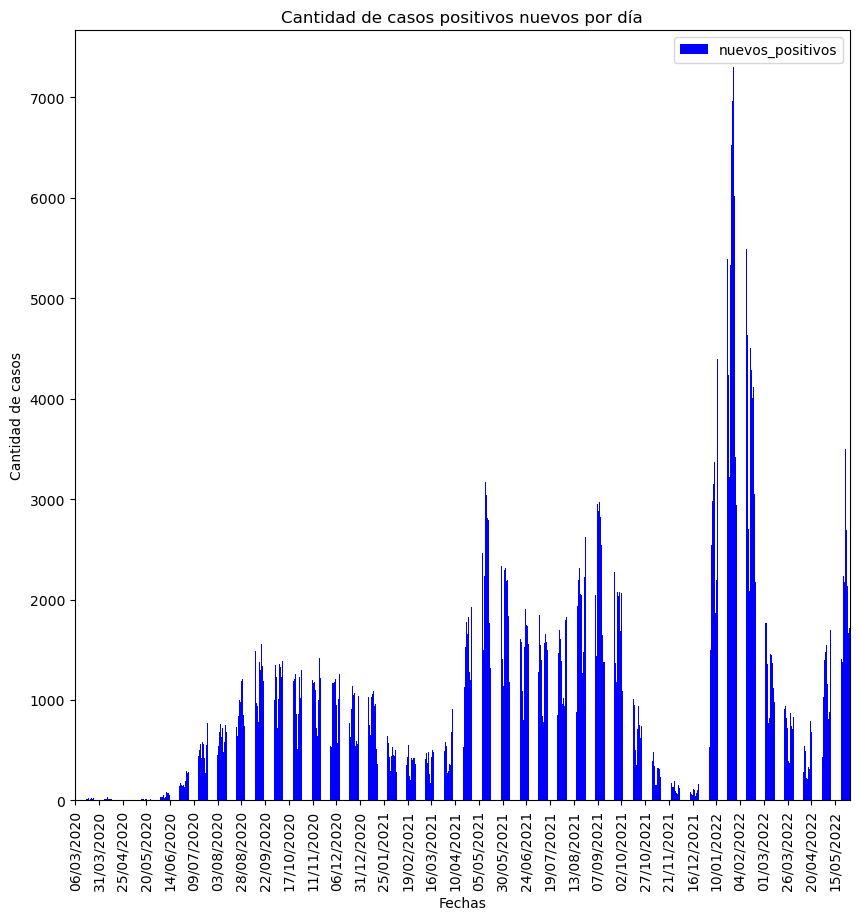

In [95]:
## Gráfico de barras por fecha

covid19_generales_nuevos = covid19_generales[["fecha", "nuevos_positivos"]]

# Creación del gráfico

graph_bar = covid19_generales_nuevos.plot.bar(x="fecha", y="nuevos_positivos", color="blue", figsize=(10, 10))

plt.title("Cantidad de casos positivos nuevos por día")
plt.xticks(np.arange(0, 817, step=25))


plt.ylabel("Cantidad de casos")
plt.xlabel("Fechas")

## 3. Gráfico de líneas:  muestra la evolución a través del tiempo de los casos positivos acumulados de hombres y de los casos positivos acumulados de mujeres.

In [96]:
# Preparación de los datos:
covid_general_gráfico_líneas = covid19_generales[["fecha", "hombres_positivos", "mujeres_positivas"]]

Text(0, 0.5, 'Casos')

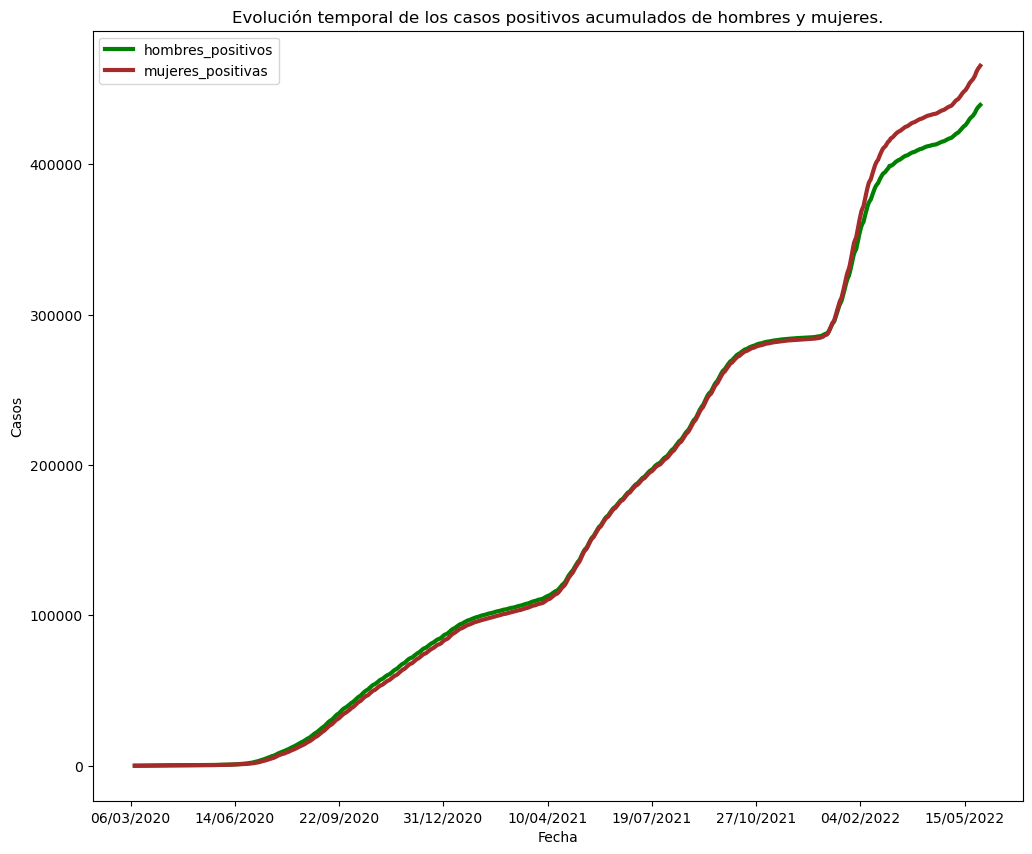

In [97]:
# Gráfico de líneas:
covid_general_gráfico_líneas.plot.line(x="fecha", 
                        y=["hombres_positivos", "mujeres_positivas"],
                        color={"hombres_positivos": "Green", 
                               "mujeres_positivas": "Brown"},
                        figsize=(12, 10),
                        linewidth=3
                       )

plt.title("Evolución temporal de los casos positivos acumulados de hombres y mujeres.")
plt.xlabel("Fecha")
plt.ylabel("Casos")


## 4. Gráfico de líneas que muestra la evolución a través del tiempo de los casos positivos acumulados de menores, los casos positivos acumulados de adultos y de los casos positivos acumulados de adultos mayores.

In [98]:
# Praparación de los datos:
covid_general_menores_adultos_amayores = covid19_generales[["fecha", "menores_positivos", "adultos_positivos", "adultosmayor_positivos"]]

Text(0, 0.5, 'Casos')

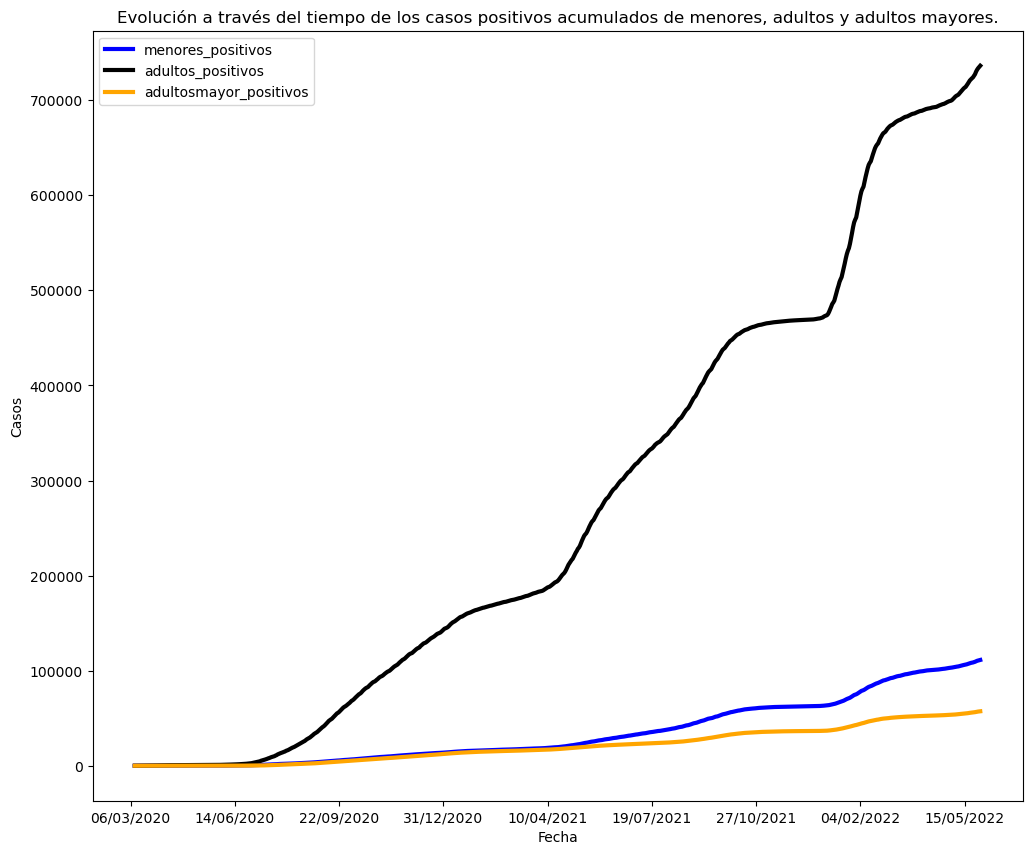

In [99]:
# Gráfico de líneas
covid_general_menores_adultos_amayores.plot.line(x="fecha", 
                        y=["menores_positivos", "adultos_positivos", "adultosmayor_positivos"],
                        color={"menores_positivos": "Blue", 
                               "adultos_positivos": "black",
                               "adultosmayor_positivos": "Orange"},
                        figsize=(12, 10),
                        linewidth=3
                       )

plt.title("Evolución a través del tiempo de los casos positivos acumulados de menores, adultos y adultos mayores.")
plt.xlabel("Fecha")
plt.ylabel("Casos")

## 5. Tabla que muestra la cantidad de casos positivos en cantones. 

In [100]:
# Tabla con los datos sobre los casos positivos por provincia y canton al 30-05-22

tabla2 = go.Figure(data=[go.Table(
    header=dict(values=list(covid19_positivos.columns),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[covid19_positivos.provincia,
                       covid19_positivos.canton, 
                       covid19_positivos.positivos],
               fill_color='lightcyan',
               line_color='darkslategray',
               font = dict(color = 'darkslategray', size = 11),
               align='center'))
])

tabla2.update_layout(width=1000, height=500)

# Mostrar tabla
tabla2.show()

## 6. Gráfico sunburst que muestra, jerárquicamente, la cantidad de casos positivos en provincias y en los cantones.

In [101]:
# Sunburst de casos positivos en cantones y provincias
px.sunburst(covid19_positivos, 
            values="positivos", 
            path=["provincia", "canton"],
            title=" Casos positivos de COVID por Provincias y Cantones de Costa Rica al 30/05/2022")